### Plot Mantanza profiles
These profiles were extracted from Global Mapper DEMs by BDA, and saved in a spreadsheet called `MtzProfilesV2.xlsx`
Profiles were in separate sheets.

CRS saved each sheet as a .csv file. Profile 9 was saved from sheet 10V2.

The .csv files were edited as follows:
* Slope values in first line were changed from `-` to `nan`
* Percent signs in slope column were removed
* `N/A` was changed to `nan` everywhere

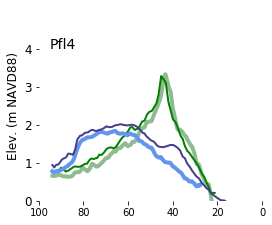

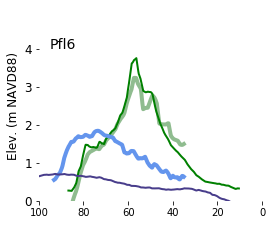

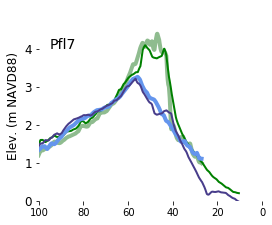

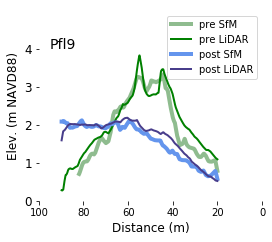

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fnlist = 'p4.csv','p6.csv','p7.csv','p9.csv'
titles = 'Pfl4','Pfl6','Pfl7','Pfl9'
s15col = 'darkseagreen'
l15col = 'g'
s16col = 'cornflowerblue'
l16col = 'darkslateblue'

# These are the profiles that go between the SfM and LiDAR diff plots
i=0
for fn in fnlist:
    df=pd.read_csv(fn,delimiter=',',header=0)
    x = df["Distance (Total)"].values
    s15 = df['Sfm 2015'].values
    l15 = df['LiDAR Pre'].values
    s16 = df['Sfm 2016'].values
    l16 = df['LiDAR Post'].values
    
    # some profile-specific edits to remove weird data near surf zone
    if(i==0):
        s15[x<=20]=np.nan
    if(i==1):
        s15[x<=35]=np.nan
        s16[x<=35]=np.nan
    if(i==2):
        s15[x<=27]=np.nan
        s16[x<=27]=np.nan
    if(i==3):
        x = x+20
        s15[x>=82]=np.nan

    fig  = plt.figure(figsize=(4,3.5))
    ax = plt.subplot(1,1,1)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.plot(x,s15,linewidth=4,label='pre SfM',color=s15col)
    plt.plot(x,l15,linewidth=2,label='pre LiDAR',color=l15col)
    plt.plot(x,s16,linewidth=4,label='post SfM',color=s16col)
    plt.plot(x,l16,linewidth=2,label='post LiDAR',color=l16col)
    plt.yticks(range(0, 5, 1), fontsize=12) 
    plt.ylabel('Elev. (m NAVD88)',fontsize=12)
    plt.xlim(100,0)
    plt.ylim(0,5)
    plt.text(95,4,titles[i],fontsize=14)
    if i==3:
        plt.legend(loc=1)
        plt.xlabel('Distance (m)',fontsize=12)
    #plt.grid(True)
    plt.savefig(titles[i]+'.png')
    plt.show()
    i=i+1

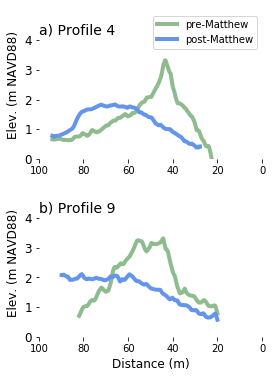

In [2]:
# These are the profiles that go in a separate figure
fnlist2 = 'p4.csv','p9.csv'
titles2 = 'a) Profile 4','b) Profile 9'

i=0
fig  = plt.figure(figsize=(4,6))

for fn in fnlist2:
    df=pd.read_csv(fn,delimiter=',',header=0)
    x = df["Distance (Total)"].values
    s15 = df['Sfm 2015'].values
    s16 = df['Sfm 2016'].values
    
    # some profile-specific edits to remove weird data near surf zone
    if(i==0):
        s15[x<=20]=np.nan
    if(i==1):
        x = x+20
        s15[x>=82]=np.nan

    ax = plt.subplot(2,1,i+1)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.plot(x,s15,linewidth=4,label='pre-Matthew',color=s15col)
    plt.plot(x,s16,linewidth=4,label='post-Matthew',color=s16col)
    plt.yticks(range(0, 5, 1), fontsize=12) 
    plt.ylabel('Elev. (m NAVD88)',fontsize=12)
    plt.xlim(100,0)
    plt.ylim(0,5)
    plt.text(100,4.2,titles2[i],fontsize=14)
    if i==0:
            plt.legend(loc=1)
    if i==1:
        plt.xlabel('Distance (m)',fontsize=12)
    #plt.grid(True)
    i=i+1
    
    
plt.savefig('sfm4_9.png')
plt.show()
